In [1]:
import matplotlib.pyplot as plt
import pandas as pd

plt.rc("font", family="Malgun Gothic")
plt.rc('axes', unicode_minus=False)
plt.rcParams['grid.color'] = (0.5, 0.5, 0.5, 0.1)
df = pd.read_csv("../.out/cycles.csv", index_col="Unnamed: 0")
df

,portfolio,benchmark,outperform,cycles_portfolio_cumprod,cycles_benchmark_cumprod
2001-05-31,0.134637,0.118884,0.015753,1.134637e+00,1.118884
2001-06-29,-0.034626,0.001671,-0.036297,1.095349e+00,1.120753
2001-07-31,0.115645,-0.109240,0.224885,1.222020e+00,0.998322
2001-08-31,-0.022757,-0.047135,0.024378,1.194210e+00,0.951266
2001-09-28,-0.140885,-0.129031,-0.011854,1.025964e+00,0.828523
...,...,...,...,...,...
2022-06-30,-0.135351,-0.163338,0.027988,7.048957e+06,25.419612
2022-07-29,0.054532,0.069334,-0.014802,7.433351e+06,27.182067
2022-08-31,0.107410,0.009708,0.097702,8.231769e+06,27.445961
2022-09-30,-0.151428,-0.156753,0.005325,6.985248e+06,23.143721


strategy 1.0560212791436632 (-0.4382602107339595, ('2008-05-30', '2008-10-31'))
benchmark 0.1547884662573915 (-0.5211243853549963, ('2007-07-31', '2008-10-31'))


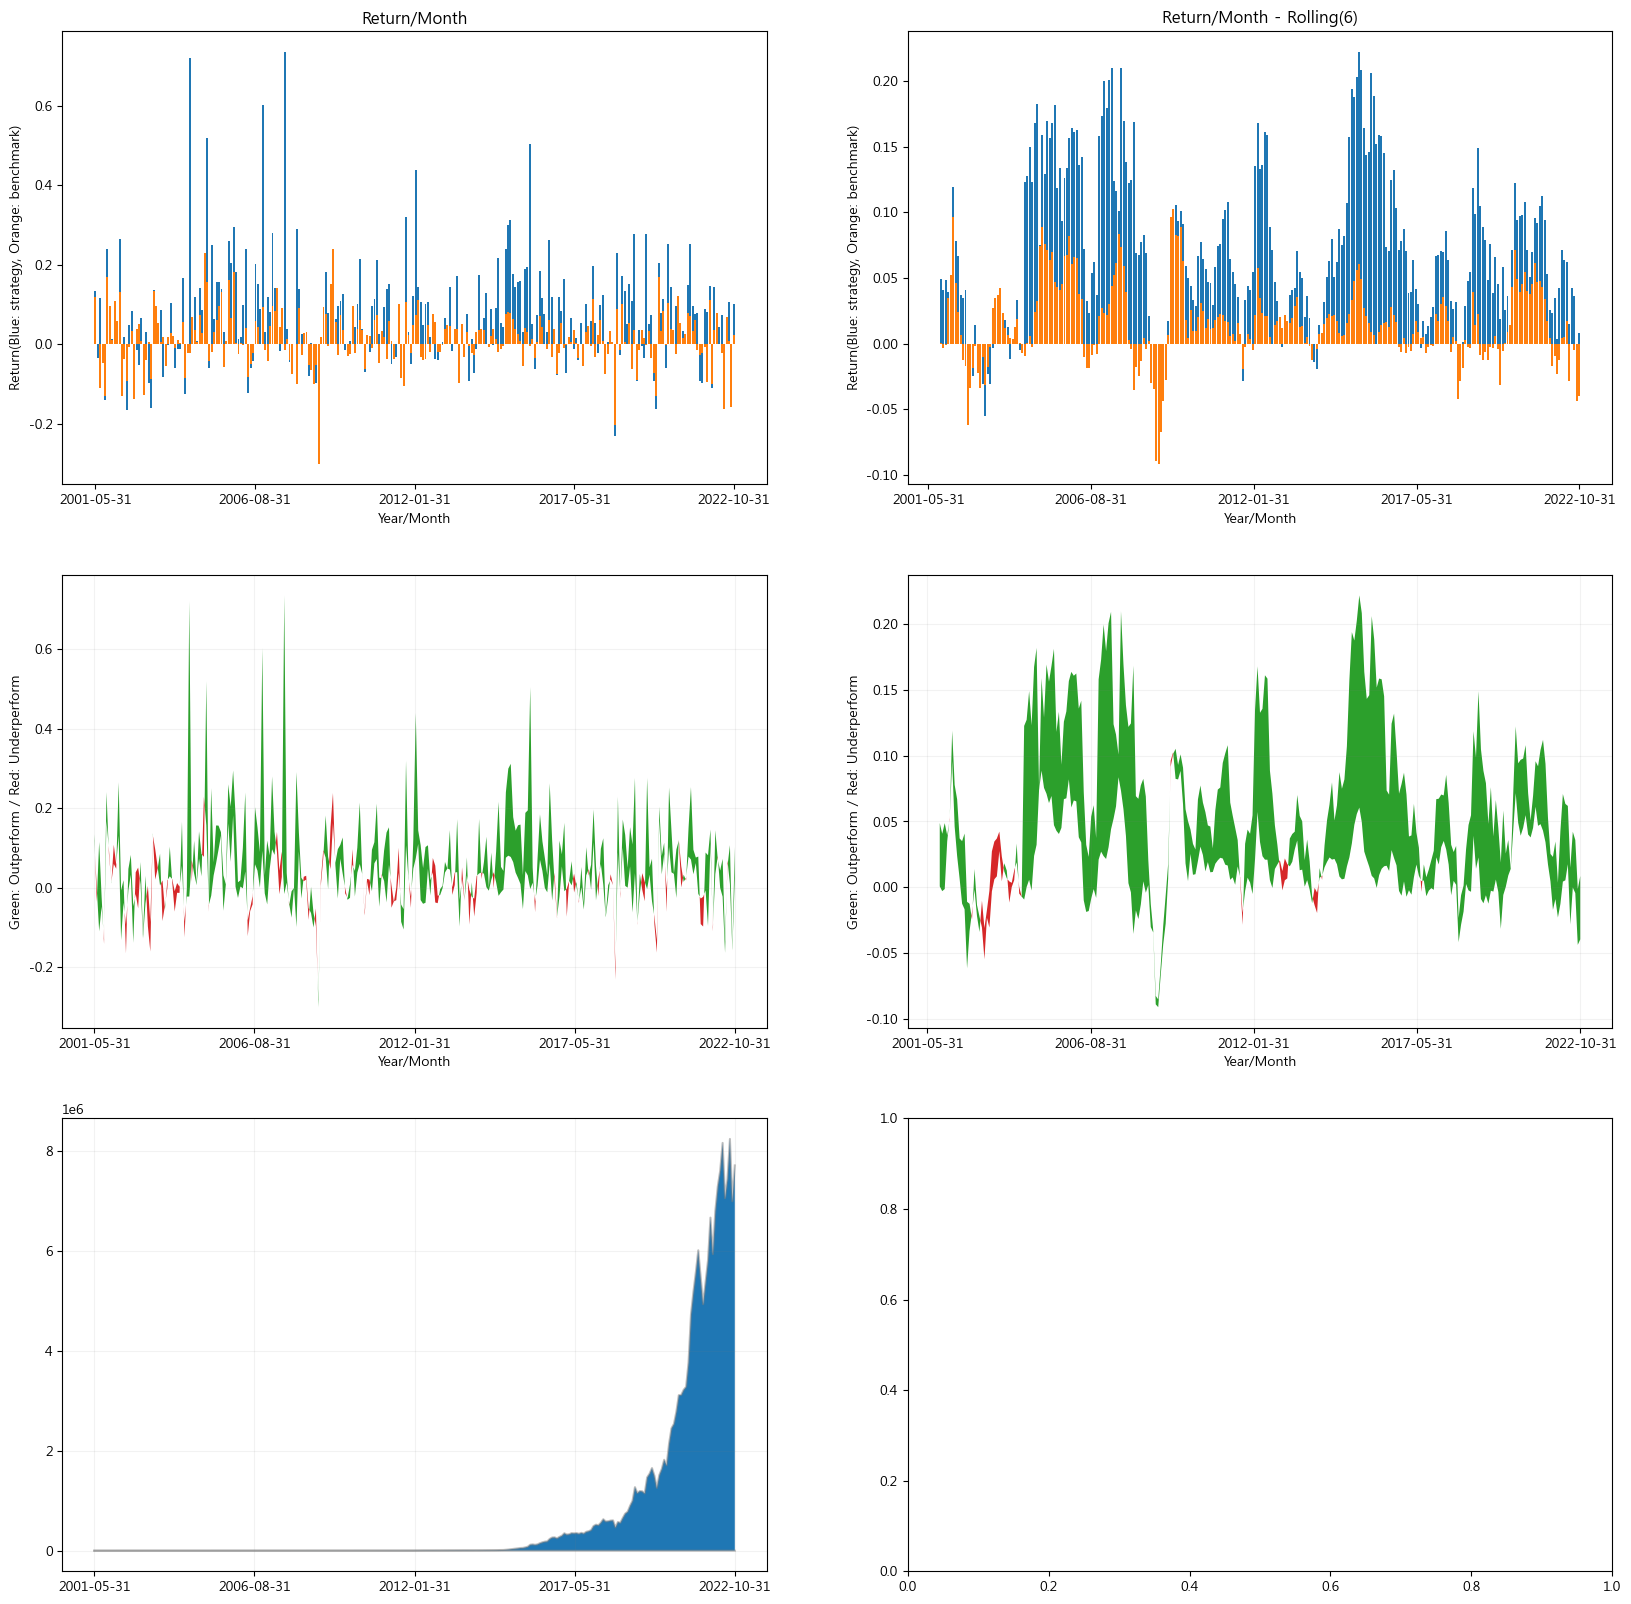

In [2]:
import numpy as np

fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2)
fig.set_figwidth(20)
fig.set_figheight(20)

x_label = "Year/Month"
y_label = "Return(Blue: strategy, Orange: benchmark)"
ax1.set_title(f"Return/Month")
ax1.set_xlabel(x_label)
ax1.set_ylabel(y_label)
ax1.set_xticks(np.quantile(np.arange(0, len(df)), [0, 0.25, 0.5, 0.75, 1]))
ax1.bar(df.index, df["portfolio"])
ax1.bar(df.index, df["benchmark"])

window = 6
x_label = "Year/Month"
y_label = "Return(Blue: strategy, Orange: benchmark)"
ax2.set_title("Return/Month - Rolling(6)")
ax2.set_xlabel(x_label)
ax2.set_ylabel(y_label)
ax2.set_xticks(np.quantile(np.arange(0, len(df)), [0, 0.25, 0.5, 0.75, 1]))
ax2.bar(df.index, df["portfolio"].rolling(window).mean())
ax2.bar(df.index, df["benchmark"].rolling(window).mean())


def compare(ax, _x, _y1, _y2):
    xticks = np.quantile(np.arange(0, len(df)), [0, 0.25, 0.5, 0.75, 1])
    ax.set_xticks(xticks)
    ax.set_xlabel("Year/Month")
    ax.set_ylabel("Green: Outperform / Red: Underperform")
    ax.grid(True)
    ax.fill_between(_x, _y1, _y2, where=_y1 > _y2, facecolor='tab:green', interpolate=True)
    ax.fill_between(_x, _y1, _y2, where=_y1 < _y2, facecolor='tab:red', interpolate=True)


window = 6
compare(ax3, df.index, df["portfolio"], df["benchmark"])
compare(ax4, df.index, df["portfolio"].rolling(window).mean(), df["benchmark"].rolling(window).mean())

x = df.index
y1 = (df["portfolio"] + 1).cumprod()
y2 = (df["benchmark"] + 1).cumprod()
ax5.grid(True)
ax5.plot(x, y1, color="grey", alpha=0.5)
ax5.plot(x, y2, color="grey", alpha=0.5)
ax5.fill_between(x, y1, y2, where=y1 > y2, facecolor='tab:blue', interpolate=True)
ax5.fill_between(x, y1, y2, where=y1 < y2, facecolor='tab:orange', interpolate=True)
ax5.set_xticks(np.quantile(np.arange(0, len(df)), [0, 0.25, 0.5, 0.75, 1]))
ax5.set_title("")

from base import cagr, mdd

print("strategy", cagr(1, y1[-1], len(y1) / 12), mdd(df.index, y1))
print("benchmark", cagr(1, y2[-1], len(y2) / 12), mdd(df.index, y2))
